In [2]:
from IPython.display import Image

In [1]:
import torch
import torch.nn as nn

파이토치에서는  
embedding layer를 만들어 훈련 데이터로부터 처음부터 임베딩 벡터를 학습하는 방법과,  
pre-trained word embedding들을 가져와 사용하는 방법이 있다.  
이번 챕터는 전자에 대해서 배운다.  

### 1. 임베딩 층은 룩업 테이블이다.

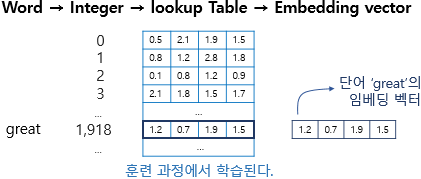

In [3]:
Image("./scr/12-06 lookup_table.png")

임베딩 층의 입력으로 사용하기 위해서 입력 시퀀스의 각 단어들은 모두 정수 인코딩이 되어 있어야 한다.  

어떤 단어 → 단어에 부여된 고유한 정수값 → 임베딩 층 통과 → 밀집 벡터 

파이토치는 단어를 정수 인덱스로만 바꾼채로 임베딩 층의 입력으로 사용해도 룩업 테이블 된 결과인 임베딩 벡터를 리턴한다.  

룩업 테이블 과정을 nn.Embedding()을 사용하지 않고 구현하면서 이해해보자.

In [4]:
train_data = 'you need to know how to code'

# 중복을 제거한 단어들의 집합인 단어 집합 생성.
word_set = set(train_data.split())

# 단어 집합의 각 단어에 고유한 정수 맵핑.
vocab = {word: i + 2 for i, word in enumerate(word_set)}
vocab['<unk>'] = 0
vocab['<pad>'] = 1
print(vocab)

{'to': 2, 'need': 3, 'how': 4, 'you': 5, 'code': 6, 'know': 7, '<unk>': 0, '<pad>': 1}


이제 단어 집합의 크기를 행으로 가지는 임베딩 테이블을 구현한다.  
이때, 임베딩 벡터의 차원은 3으로 정했다.  

In [5]:
# 단어 집합의 크기만큼의 행을 가지는 테이블 생성.
embedding_table = torch.FloatTensor([
                               [ 0.0,  0.0,  0.0],
                               [ 0.0,  0.0,  0.0],
                               [ 0.2,  0.9,  0.3],
                               [ 0.1,  0.5,  0.7],
                               [ 0.2,  0.1,  0.8],
                               [ 0.4,  0.1,  0.1],
                               [ 0.1,  0.8,  0.9],
                               [ 0.6,  0.1,  0.1]])

이제 임의의 문장 'you need to run'에 대해서 룩업 테이블을 통해 임베딩 벡터를 가져와보자.  

In [ ]:
sample: list  = 'you need to run'.split()
idxes = []

# 각 단어들을 정수로 변환
for word in sample:
    try:
        idxes.append(vocab[word])
    # 단어 집합에 없는 단어일 경우 <unk>로 대체된다.
    except KeyError:
        idxes.append(vocab['<unk>'])
idxes = torch.LongTensor(idxes)


# 각 정수를 인덱스로 임베딩 테이블에서 값을 가져온다.
lookup_result = embedding_table[idxes, :]
print(lookup_result)

tensor([[0.4000, 0.1000, 0.1000],
        [0.1000, 0.5000, 0.7000],
        [0.2000, 0.9000, 0.3000],
        [0.0000, 0.0000, 0.0000]])


### 2. 임베딩 층 사용하기

In [ ]:
train_data = 'you need to know how to code'

# 중복을 제거한 단어들의 집합인 단어 집합 생성.
word_set = set(train_data.split())

# 단어 집합의 각 단어에 고유한 정수 맵핑.
vocab = {tkn: i+2 for i, tkn in enumerate(word_set)}
vocab['<unk>'] = 0
vocab['<pad>'] = 1


이제 nn.Embedding()을 사용하여 학습가능한 임베딩 테이블을 만든다.

In [ ]:
embedding_layer = nn.Embedding(num_embeddings=len(vocab),
                               embedding_dim=3,
                               padding_idx=1)

nn.Embedding은 크게 두 가지 인자를 받는데      
각각 num_embeddings과 embedding_dim이다.    
num_embeddings : 단어 집합의 크기, 즉 임베딩할 단어 개수이다.  
embedding_dim : 임베딩 할 벡터의 차원, 사용자가 지정한다.  
padding_idx : 패딩을 위한 토큰의 인덱스를 알려준다.  

In [ ]:
print(embedding_layer.weight)

Parameter containing:
tensor([[-1.2163, -0.3130, -1.9854],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.8470, -0.3990, -0.8981],
        [ 1.7707, -0.2078, -0.8524],
        [ 0.7884, -0.8605, -1.2288],
        [ 0.3159, -0.6077, -0.3161],
        [ 0.7067,  0.5075,  0.9179],
        [ 0.4833,  1.1937, -0.4662]], requires_grad=True)
